<h2>Table of Contents</h2>
<p>In this lab, you will deal with several problems associated with optimization and see how momentum can improve your results.</p>
<ul>
    <li><a href="#Saddle">Saddle Points</a></li>
    <li><a href="#Minima">Local Minima</a></li>
    <li><a href="#Noise"> Noise </a></li>
</ul>

<p>Estimated Time Needed: <b>25 min</b></p>
<hr>


In [1]:
# These are the libraries that will be used for this lab.

import torch 
import torch.nn as nn
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

This function will plot a cubic function and the parameter values obtained via Gradient Descent.


In [3]:
# Plot the cubic

def plot_cubic(w, optimizer):
    LOSS = []
    # parameter values 
    W = torch.arange(-4, 4, 0.1)
    # plot the loss fuction 
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(cubic(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 4.0
    n_epochs = 10
    parameter = []
    loss_list = []

    # n_epochs
    # Use PyTorch custom module to implement a ploynomial function
    for n in range(n_epochs):
        optimizer.zero_grad() 
        loss = cubic(w(torch.tensor([[1.0]])))
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    plt.plot(parameter, loss_list, 'ro', label='parameter values')
    plt.plot(W.numpy(), LOSS, label='objective function')
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

This function will plot a 4th order function and the parameter values obtained via Gradient Descent. You can also add Gaussian noise with a standard deviation determined by the parameter <code>std</code>.


In [4]:
# Plot the fourth order function and the parameter values

def plot_fourth_order(w, optimizer, std=0, color='r', paramlabel='parameter values', objfun=True):
    W = torch.arange(-4, 6, 0.1)
    LOSS = []
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(fourth_order(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 6
    n_epochs = 100
    parameter = []
    loss_list = []

    #n_epochs
    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = fourth_order(w(torch.tensor([[1.0]]))) + std * torch.randn(1, 1)
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    
    # Plotting
    if objfun:
        plt.plot(W.numpy(), LOSS, label='objective function')
    plt.plot(parameter, loss_list, 'ro',label=paramlabel, color=color)
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

In [5]:
# Create a linear model

class one_param(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(one_param, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=False)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [6]:
# Create a one_param object

w = one_param(1, 1)

<h2 id="Saddle">Saddle Points</h2>


In [7]:
# Define a function to output a cubic 

def cubic(yhat):
    out = yhat ** 3
    return out

In [8]:
# Create a optimizer without momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0)

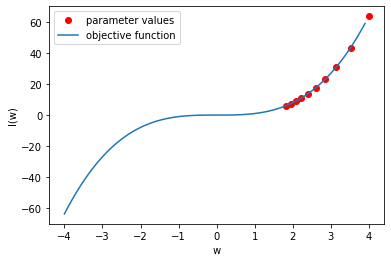

In [9]:
# Plot the model

plot_cubic(w, optimizer)

In [10]:
# Create a optimizer with momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0.9)

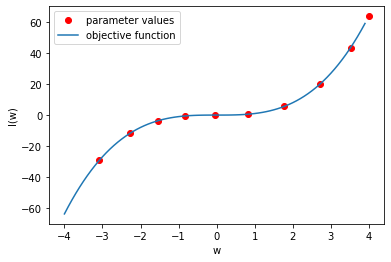

In [11]:
# Plot the model

plot_cubic(w, optimizer)

<h2 id="Minima">Local Minima</h2>


In [12]:
# Create a function to calculate the fourth order polynomial 

def fourth_order(yhat): 
    out = torch.mean(2 * (yhat ** 4) - 9 * (yhat ** 3) - 21 * (yhat ** 2) + 88 * yhat + 48)
    return out

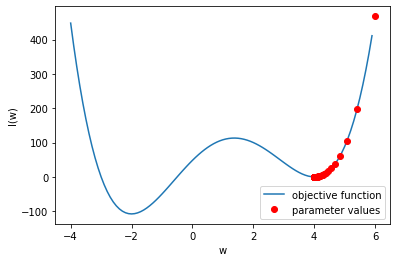

In [13]:
# Make the prediction without momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer)

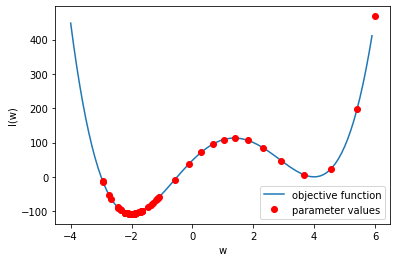

In [14]:
# Make the prediction with momentum

optimizer = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)
plot_fourth_order(w, optimizer)

<h2 id="Noise">Noise</h2>


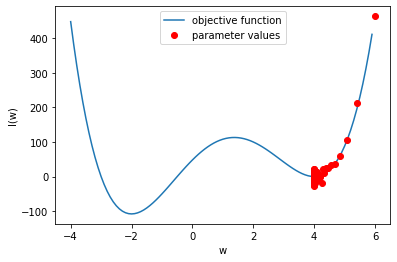

In [15]:
# Make the prediction without momentum when there is noise

optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer, std=10)

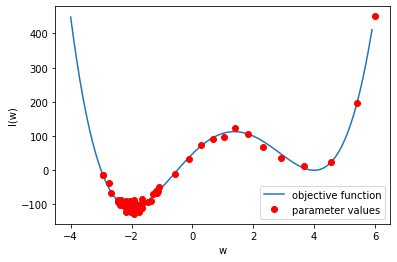

In [16]:
# Make the prediction with momentum when there is noise

optimizer = torch.optim.SGD(w.parameters(), lr=0.001,momentum=0.9)
plot_fourth_order(w, optimizer, std=10)

<h3>Practice</h3>


Create two <code> SGD</code>  objects with a learning rate of <code> 0.001</code>. Use the default momentum parameter value  for one and a value of <code> 0.9</code> for the second. Use the function <code>plot_fourth_order</code> with an <code>std=100</code>, to plot the different steps of each. Make sure you run the function on two independent cells.


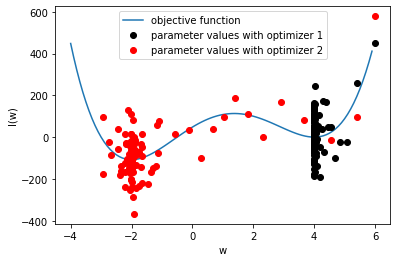

In [17]:
optimizer1 = torch.optim.SGD(w.parameters(), lr = 0.001)
plot_fourth_order(w, optimizer1, std = 100, color = 'black', paramlabel = 'parameter values with optimizer 1')

optimizer2 = torch.optim.SGD(w.parameters(), lr = 0.001, momentum = 0.9)
plot_fourth_order(w, optimizer2, std = 100, color = 'red', paramlabel = 'parameter values with optimizer 2', objfun = False)